In [74]:
import yaml
import sys
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('..')
from ai4mat.data.data import StorageResolver, get_dichalcogenides_innopolis

In [43]:
storage_resolver = StorageResolver()
experiment_name = "combined_mixed_weighted_test"
experiment_path = storage_resolver["experiments"].joinpath(experiment_name)
with open(experiment_path.joinpath("config.yaml")) as experiment_file:
    experiment = yaml.safe_load(experiment_file)
folds_data = pd.read_csv(experiment_path.joinpath("folds.csv.gz"),
                            index_col="_id")
folds = folds_data.loc[:, 'fold']
weights = folds_data.loc[:, 'weight'] if 'weight' in folds_data.columns else\
    pd.Series(data=np.ones((len(folds))), index=folds.index)
true_targets = pd.concat(
    [pd.read_csv(storage_resolver["processed"] / dataset / "targets.csv.gz", index_col="_id")
        for dataset in experiment["datasets"]], axis=0).reindex(
    index=folds.index)

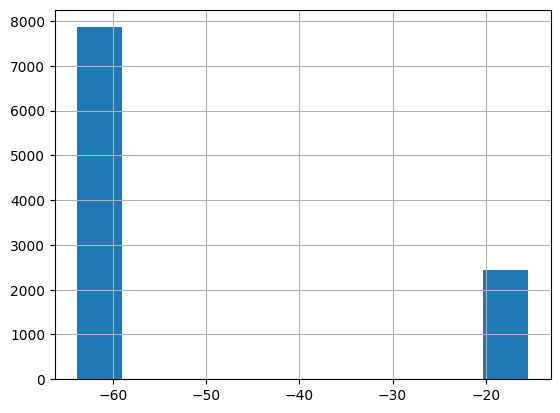

In [45]:
true_targets.E_1.hist();

In [51]:
true_targets[true_targets.normalized_homo_majority > 40]

,descriptor_id,energy,fermi_level,homo_lumo_gap,lumo,homo,E_1,formation_energy,formation_energy_per_site,energy_per_atom,...,normalized_lumo_max,homo_lumo_gap_min,homo_min,lumo_min,normalized_homo_min,normalized_lumo_min,total_mag,E_1_majority,E_1_minority,band_gap
_id,,,,,,,,,,,,,,,,,,,,,
WSe2_Mo1W63Se125S2_fc315abc-52a0-4944-bb2e-e331d136f365,f58a2030-3441-4db8-90d9-15b9fb7d22ed,-1379.122911,-1.439832,1.2984,-0.7715,-2.0699,-62.8373,1.495189,0.373797,-7.220539,...,47.5848,1.2984,-2.0699,-0.7715,46.2864,47.5848,0.0,NaN,NaN,NaN
WSe2_Mo1W62Se126S1_3faaa513-a7f3-44be-980b-a5aa50c6acf4,d86937b2-4a42-46eb-bb12-fa31076dd84a,-1359.939092,-1.625535,0.1349,-1.2317,-1.3666,-62.8767,7.030408,1.757602,-7.157574,...,47.1640,0.1349,-1.3666,-1.2317,47.0291,47.1640,0.0,NaN,NaN,NaN
WSe2_Mo1W63Se125S2_ae703ee3-8f05-42a2-9118-c5fb383ab433,f58a2030-3441-4db8-90d9-15b9fb7d22ed,-1379.103295,-1.438029,1.3009,-0.7718,-2.0727,-62.8538,1.514805,0.378701,-7.220436,...,47.6010,1.3009,-2.0727,-0.7718,46.3001,47.6010,0.0,NaN,NaN,NaN
WSe2_Mo1W63Se125S2_e21d07a0-33ca-4898-836d-308bf6bf8c3b,f58a2030-3441-4db8-90d9-15b9fb7d22ed,-1379.124625,-1.432281,1.2797,-0.7922,-2.0719,-62.8054,1.493475,0.373369,-7.220548,...,47.5322,1.2797,-2.0719,-0.7922,46.2525,47.5322,0.0,NaN,NaN,NaN
WSe2_Mo2W61Se127S1_5949da26-1150-4c49-8cf7-6b21903de11e,636d2e02-9c5e-4763-a158-4a4b8e917fd3,-1364.369239,-1.602851,0.1489,-1.2094,-1.3583,-62.9566,4.011861,1.002965,-7.143294,...,47.2662,0.1489,-1.3583,-1.2094,47.1173,47.2662,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619cdd9945851b2ed24325e3,619cdd9644389dee486ade44,-1378.084307,-0.322624,1.2988,0.3347,-0.9641,-61.6969,1.895793,0.631931,-7.215101,...,47.5506,1.2988,-0.9641,0.3347,46.2518,47.5506,0.0,NaN,NaN,1.2988
619cdd9945851b2ed24325e4,619cdd9644389dee486ade41,-1370.830580,-0.342830,1.1402,0.1638,-0.9764,-61.7481,5.022520,1.674173,-7.214898,...,47.4309,1.1402,-0.9764,0.1638,46.2907,47.4309,0.0,NaN,NaN,1.1402
619cdd9945851b2ed24325e5,619cdd9644389dee486ade41,-1370.841472,-0.351190,1.2691,0.2894,-0.9797,-61.7616,5.011628,1.670543,-7.214955,...,47.5700,1.2691,-0.9797,0.2894,46.3009,47.5700,0.0,NaN,NaN,1.2691


In [52]:
sus_id = "WSe2_Mo1W63Se125S2_fc315abc-52a0-4944-bb2e-e331d136f365"

In [36]:
structures, descriptions = get_dichalcogenides_innopolis("../datasets/csv_cif/high_density_defects/WSe2_500/")

  0%|          | 0/500 [00:00<?, ?it/s]

/home/kna/.cache/pypoetry/virtualenvs/2d-defects-potential-learning-pYjw2mkT-py3.10/lib64/python3.10/site-packages/pymatgen/io/cif.py:1153: UserWarning: Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


In [55]:
true_targets.loc[sus_id]

descriptor_id                f58a2030-3441-4db8-90d9-15b9fb7d22ed
energy                                               -1379.122911
fermi_level                                             -1.439832
homo_lumo_gap                                              1.2984
lumo                                                      -0.7715
homo                                                      -2.0699
E_1                                                      -62.8373
formation_energy                                         1.495189
formation_energy_per_site                                0.373797
energy_per_atom                                         -7.220539
normalized_homo                                           46.2864
normalized_lumo                                           47.5848
homo_lumo_gap_majority                                     1.2984
homo_majority                                             -2.0699
lumo_majority                                             -0.7715
normalized

In [56]:
structures.loc["WSe2_Mo1W63Se125S2_fc315abc-52a0-4944-bb2e-e331d136f365"]


descriptor_id                     f58a2030-3441-4db8-90d9-15b9fb7d22ed
energy                                                    -1379.122911
fermi_level                                                  -1.439832
homo_lumo_gap                                                   1.2984
lumo                                                           -0.7715
homo                                                           -2.0699
E_1                                                           -62.8373
initial_structure    [[14.97182606 16.32751057  3.7672378 ] Mo, [1....
Name: WSe2_Mo1W63Se125S2_fc315abc-52a0-4944-bb2e-e331d136f365, dtype: object

In [61]:
WSe2_targets = pd.read_csv("../datasets/processed/high_density_defects/WSe2_500/targets.csv.gz", index_col="_id")

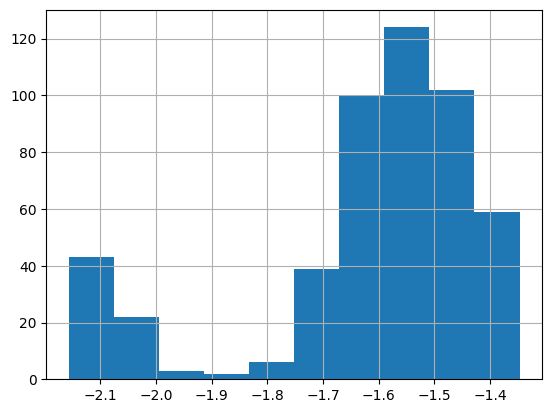

In [64]:
WSe2_targets.homo.hist();

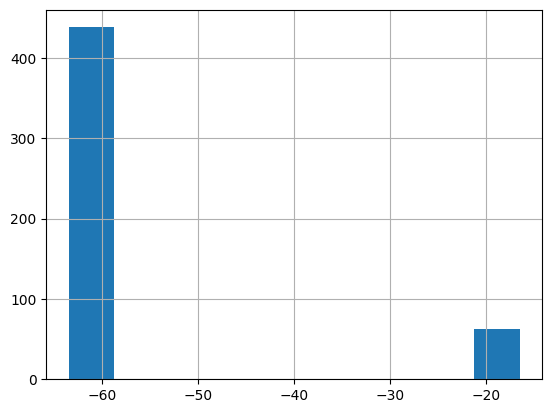

In [68]:
WSe2_targets.E_1.hist();

In [69]:
WSe2_targets.E_1 > -30

_id
WSe2_Mo1W63Se125S2_fc315abc-52a0-4944-bb2e-e331d136f365    False
WSe2_Mo1W62Se126S1_3faaa513-a7f3-44be-980b-a5aa50c6acf4    False
WSe2_W63Se125S2_3480add9-1fc1-4b55-96a9-e7380d46b87d        True
WSe2_Mo2W60Se128_758a9139-5ed1-476a-b1b9-7edb966f0433      False
WSe2_W63Se125S1_af39f713-a099-46a6-9099-45d7d384fa36        True
                                                           ...  
WSe2_Mo4W56Se112S8_6806f9bd-441b-4caa-93ea-dad6b97df695    False
WSe2_Mo4W56Se112S8_364b699e-ee3e-425b-9026-63ea6f35faaf    False
WSe2_Mo4W56Se112S8_ba1368b5-5e16-4077-a333-099b747dde80    False
WSe2_Mo4W56Se112S8_c255c559-5eeb-457f-a463-f22d9308ecab    False
WSe2_Mo4W56Se112S8_e7031dcd-1621-4756-bd39-273b0b78aea9    False
Name: E_1, Length: 500, dtype: bool

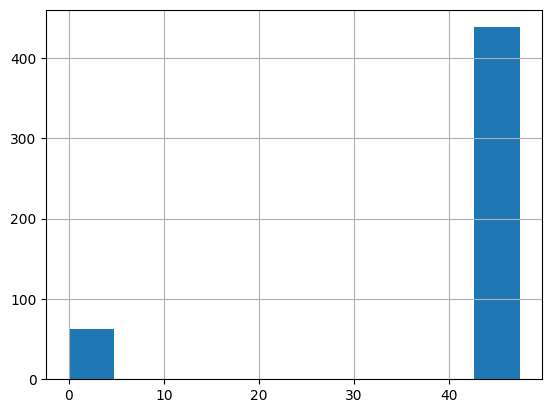

In [70]:
WSe2_targets.normalized_homo.hist();

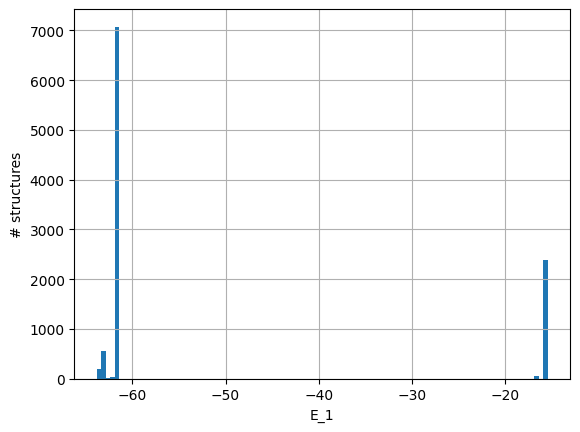

In [76]:
fig, ax = plt.subplots()
true_targets.E_1.hist(bins=100, ax=ax)
ax.set_xlabel("E_1")
ax.set_ylabel("# structures");